In [1]:
import pandas as pd
import tweepy as tw
import csv
from PIL import Image
import numpy as np
import matplotlib.patches as mpatches
from csv import writer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
import regex as re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import pi
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# File reading  

In [45]:
#Reading all final csv files into dataframe for visulaization 
#Schizophrenia
s = pd.read_csv('clean_Schizophrenia2.csv')
suae  = pd.read_csv('clean_Schizophrenia2_UAE.csv')
ssg  = pd.read_csv('clean_Schizophrenia2_SG.csv')

s0 = pd.read_csv('clean_Schizophrenia.csv')
s0uae= pd.read_csv('clean_SchizophreniaUAE.csv')
s0sg = pd.read_csv('clean_SchizophreniaSG.csv')

#Depression
d = pd.read_csv('clean_Depression2.csv')
duae  = pd.read_csv('clean_Depression2_UAE.csv')
dsg  = pd.read_csv('clean_Depression2_SG.csv')

d0 = pd.read_csv('clean_depression.csv')
d0uae= pd.read_csv('clean_DepressionUAE.csv')
d0sg = pd.read_csv('clean_DepressionSG.csv')

#Bipolar
b = pd.read_csv('clean_Bipolar2.csv')
buae  = pd.read_csv('clean_Bipolar2_UAE.csv')
bsg  = pd.read_csv('clean_Bipolar2_SG.csv')

b0 = pd.read_csv('clean_bipolar.csv')
b0uae=pd.read_csv('clean_BipolarUAE.csv')
b0sg = pd.read_csv('clean_BipolarSG.csv')

In [35]:
sch = pd.read_csv('tweets_df_schizophrenia.csv')
dep = pd.read_csv('tweets_df_depression.csv')
bip = pd.read_csv('tweets_df_bipolar.csv')

In [4]:
sch_sym = pd.read_csv("sch_sym.csv")
dep_sym = pd.read_csv("dep_sym.csv")
bip_sym = pd.read_csv("bip_sym.csv")

In [57]:
#cases
cases_us = [0,36741,300777,1178403]
cases_uae = [0,994,3647,3014]
cases_sg = [0,1037,58,24080]
#deaths 
d_us =[0,2289,4098,3022]
d_uae =[0,13,18,5]
d_sg =[0,1,17,15]

In [7]:
#list of years in which tweets were extracted 
year = [2019,2020,2021,2022]

In [46]:
def t(file):
    return file[["0","target"]]

In [47]:
# dataframe for wordcloud
df1 = pd.DataFrame(t(s)) #Schizophrenia us
df2 = pd.DataFrame(t(suae)) #Schizophrenia uae
df3 = pd.DataFrame(t(ssg)) #Schizophrenia singapore
df4 = pd.DataFrame(t(d)) #depression us
df5 = pd.DataFrame(t(duae)) # depression uae
df6 = pd.DataFrame(t(dsg)) #depression singapore
df7 = pd.DataFrame(t(b)) #bipolar us
df8 = pd.DataFrame(t(buae)) #bipolar uae
df9 = pd.DataFrame(t(bsg)) #bipolar singapore

In [36]:
sch_df = pd.DataFrame(sch["tweet_text"])
dep_df = pd.DataFrame(dep["tweet_text"])
bip_df = pd.DataFrame(bip["tweet_text"])

# Functions for visualization 

In [5]:
# function to count number of tweets in each year 
def count(file):
    count19= 0
    count20= 0
    count21= 0
    count22= 0
    for time in file['timestamp']:
        if '2019' in time:
            count19 = count19 +1
        elif '2020' in time:
            count20 = count20 +1
        elif '2021' in time:
            count21 = count21 +1
        else:
            count22 = count22 +1
    c = [count19,count20,count21,count22] # list to save all count numbers 
    return c

In [6]:
#Schizophrenia count
ss = count(s)
s1 = count(suae)
s2 = count(ssg)

#depression count
dd = count(d)
d1 = count(duae)
d2 = count(dsg)

#bipolar count
bb = count(b)
b1 = count(buae)
b2 = count(bsg)

In [8]:
##getting lengths for pie
pie_s = (len(s),len(s0))
pie_suae = (len(suae),len(s0uae))
pie_ssg = (len(ssg),len(s0sg))

pie_d = (len(d),len(d0))
pie_duae = (len(duae),len(d0uae))
pie_dsg = (len(dsg),len(d0sg))

pie_b = (len(b),len(b0))
pie_buae = (len(buae),len(b0uae))
pie_bsg = (len(bsg),len(b0sg))

In [54]:
# We created this function to avoid repetition of code, it takes in the data for which word cloud needs to be generated and returns
# the wordcloud for that dataset.
def show_wordcloud(tweets, title):
    #mask = np.array(Image.open('twitter.png'))
    # We initialize a wordcloud with its characteristics
    wc = WordCloud(
        background_color='white',       # Set the background of word cloud as white
        stopwords=set(stopwords.words("english")),      # Use stopwords from the english language
        max_words=5000,      # Display a maximum of 200 words in one word cloud
        max_font_size=40,   # Largest font size for the most prominent word is set as 40
        scale=3,
        random_state=39,
        #mask= mask
    ).generate(str(tweets))       # Pass in our data to the function to generate word cloud for that dataset

    fig = plt.figure(1, figsize=(10, 10))   # Def a subfigure with a size of 12x12 inches
    plt.axis('off')     # Hide all axes for the plot
    if title: 
        fig.suptitle(title, fontsize=21)
        fig.subplots_adjust(top=1.3)

    plt.imshow(wc)       # Display the word cloud
    plt.show()

In [46]:
#pie

def pie(y, title):
    mylabels = ["people HAVE/HAD", "people TALKED"]
    myexplode = [0.2, 0]
    plt.suptitle(title , ha="center", size=20)

    plt.pie(y, labels = mylabels, explode = myexplode, shadow = True,autopct='%1.2f%%')
    plt.show() 

In [47]:
#donut 

#Function for donut visualization  
def donut(data,title, l):
    fig, ax = plt.subplots(figsize=(6,6))
    ax = plt.subplot(projection = 'polar')
    startangle = 90
    colors = ['gray', 'pink', 'steelblue']
    xs = [(i * pi *3)/ l for i in data]
    ys = [-0.2, 1, 2.2]
    left = (startangle * pi *2)/ 360 #this is to control where the bar starts
    # plot bars and points at the end to make them round
    for i, x in enumerate(xs):
        ax.barh(ys[i], x, left=left, height=1
                , color=colors[i])
        ax.scatter(x+left, ys[i], s=350, color=colors[i], zorder=2)
        ax.scatter(left, ys[i], s=350, color=colors[i], zorder=2)
        ax.text(20.2 , i , str(data[i]), color="black", fontweight="bold")

    
    plt.ylim(-4, 4)
    # legend
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Schizophrenia', markerfacecolor='gray', markersize=10),
                      Line2D([0], [0], marker='o', color='w', label='Depression', markerfacecolor='pink', markersize=10),
                      Line2D([0], [0], marker='o', color='w', label='Bipolar', markerfacecolor='steelblue', markersize=10)]
    ax.legend(handles=legend_elements, loc='center', frameon=False)
    plt.suptitle(title , ha="center", size=20)
    # clear ticks, grids, spines
    plt.xticks([])
    plt.yticks([])
    ax.spines.clear()
    plt.show()

In [19]:
# We defined a function that performs tokenization and lemmatization to further 
def gen_tokens(S):
    tokens = []     # Define an empty array to store the tokenized sentences
    ps = PorterStemmer()    # We will use porter stemmer for stemming out data
    for i in range(len(S)):        # Loop through each row of tweets
        tokenized = re.sub('[^a-zA-Z]',' ',S.iloc[i,0]).split()    # split each word using space as delimiter
        tokenized = [ps.stem(word) for word in tokenized if not word in set(stopwords.words('english'))]    # perform stemming and remove stopwords from the sentence
        tokenized = ' '.join(tokenized)     # combine the individual words of a sentence to form a sentence
        tokens.append(tokenized)        # add the tokenized sentence to the tokens array
    return tokens       # Return the tokens array containing tokenized sentences for the dataframe inputted

In [48]:
# craete tokens of tweets for wordcloud 
d1=gen_tokens(df1) # schizophrenia us
d2=gen_tokens(df2) # schizophrenia uae
d3=gen_tokens(df3) # schizophrenia singapore
d4=gen_tokens(df4) # depression us
d5=gen_tokens(df5) # depression uae
d6=gen_tokens(df6) # depression singapore
d7=gen_tokens(df7) # bipolar us
d8=gen_tokens(df8) # bipolar uae
d9=gen_tokens(df9) # bipolar singapore

In [49]:
# function for selecting tweets with target 
def tokens(f):
    pos_t = f[f['target'] == 1]      # Filter the dataset to only contain tweets with positive polarity
    neu_t = f[f['target'] == 0]      # Filter the dataset to only contain tweets with neutral polarity
    neg_t = f[f['target'] == -1]      # Filter the dataset to only contain tweets with negative polarity
    return pos_t,neu_t,neg_t 

In [50]:
# calling function 
pos_t,neu_t,neg_t = tokens(df1) #Schizophrenia US
dep_pos_t,dep_neu_t,dep_neg_t = tokens(df4) #Depression US
bip_pos_t,bip_neu_t,bip_neg_t = tokens(df7) #Bipolar US

In [51]:
#making tokens of positive,neutral and negative tweets 
#Schizophrenia
pos_tokens = gen_tokens(pos_t)     # Tokenize all the sentences that have positive sentiment using function defined above for token generation
neu_tokens = gen_tokens(neu_t)     # Tokenize all the sentences that have neutral sentiment using function defined above for token generation
neg_tokens = gen_tokens(neg_t)     # Tokenize all the sentences that have negative sentiment using function defined above for token generation

#Depression
dep_pos_tokens = gen_tokens(dep_pos_t)     # Tokenize all the sentences that have positive sentiment using function defined above for token generation
dep_neu_tokens = gen_tokens(dep_neu_t)     # Tokenize all the sentences that have neutral sentiment using function defined above for token generation
dep_neg_tokens = gen_tokens(dep_neg_t)     # Tokenize all the sentences that have negative sentiment using function defined above for token generation

#Bipolar 
bip_pos_tokens = gen_tokens(bip_pos_t)     # Tokenize all the sentences that have positive sentiment using function defined above for token generation
bip_neu_tokens = gen_tokens(bip_neu_t)     # Tokenize all the sentences that have neutral sentiment using function defined above for token generation
bip_neg_tokens = gen_tokens(bip_neg_t)     # Tokenize all the sentences that have negative sentiment using function defined above for token generation

In [37]:
sch_tokens = gen_tokens(sch_df) 
dep_tokens = gen_tokens(dep_df) 
bip_tokens = gen_tokens(bip_df) 

In [38]:
dep_tokens

['e person taught unfairli treat that alll matt',
 'mani peopl taught unlov',
 'ridicul im love mani peopl convinc im worthi love probabl purpos first time probabl year feel love like someon actual care',
 'love boyfriend anythi',
 'ien real god',
 'dog birthda',
 'abus men alway come back want crack u',
 'wish could live veg',
 'bad friend peopl love',
 'think rememb less peopl chil',
 'hate twitt',
 'wallet miss wee',
 'fg dream last night found wallet found wallet today coloratio',
 'dont think know happi peopl relationship that dont fuck monogam',
 'yone els feel like gener pretti much normal anxiet',
 'dont take shower nobodi said anyth im gonna keep live like th',
 'w someon tri kidnap last night ur ladi get phone number car dont circl around car look dent scratch get car immedi drive away check safe locatio',
 'ole lol realli think get fall year didnt get spring summer happen last wee',
 'bodi fat measur confirm need loos lb sweet oh well least im take ste',
 'take substanc abus

In [39]:
# We created this function to avoid repetition of code, it takes in the dataframe for which LDA needs to be modelled and returns
# a plot showing us most 
def gen_pyldavis(tokens):
    # n_cv = CountVectorizer(stop_words='english')
    # n_x1  = n_cv.fit_transform(df["tweet_text"])
    tokens = [d.split() for d in tokens]        # Split our tokens array that contain tokenized sentences
    id2word_n = corpora.Dictionary(tokens)      # Creates a bag of word model for our tokens
    corpus_n = [id2word_n.doc2bow(text) for text in tokens]     #
    lda_model_n = gensim.models.ldamodel.LdaModel(corpus=corpus_n,      # Initialize a LDA model
                                           id2word=id2word_n,       # Input the Bag of Words for our tokens
                                           num_topics=20,           # Set number of topics as 20 maximum
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(lda_model_n, corpus_n, id2word_n,mds='mmds')       # Generate the visualization for the given tokens
    return vis      # Return the visualization

In [49]:
#Scatter plot 

def scatter(y1,y2,y3,title):
    x=[2019, 2020, 2021, 2022]
    plt.figure(figsize=(10,5))
    plt.style.use('ggplot')
 
    plt.title(title)
    plt.xlabel('Years')
    plt.ylabel('no. of Tweets')
    ax1 =plt.scatter(x,y1,s=200,c="green",alpha=0.6,marker='o',edgecolors='black')
    ax2 =plt.scatter(x,y2,s=200,c="blue",alpha=0.5,marker='h',edgecolors='black')
    ax3 =plt.scatter(x,y3,s=200,c="red",alpha=0.5,marker='p',edgecolors='red')
    plt.legend([ax1,ax2,ax3], ['Schizophrenia','Depression','Bipolar'])
    plt.tight_layout()
 
    plt.show()

In [50]:
# radical bar chart for population
df = pd.DataFrame({'Name':['United States','UAE','SINGAPORE'],
            'Value':[332403650,10206508,5820000] })

# Visualization 

# Population pie chart 

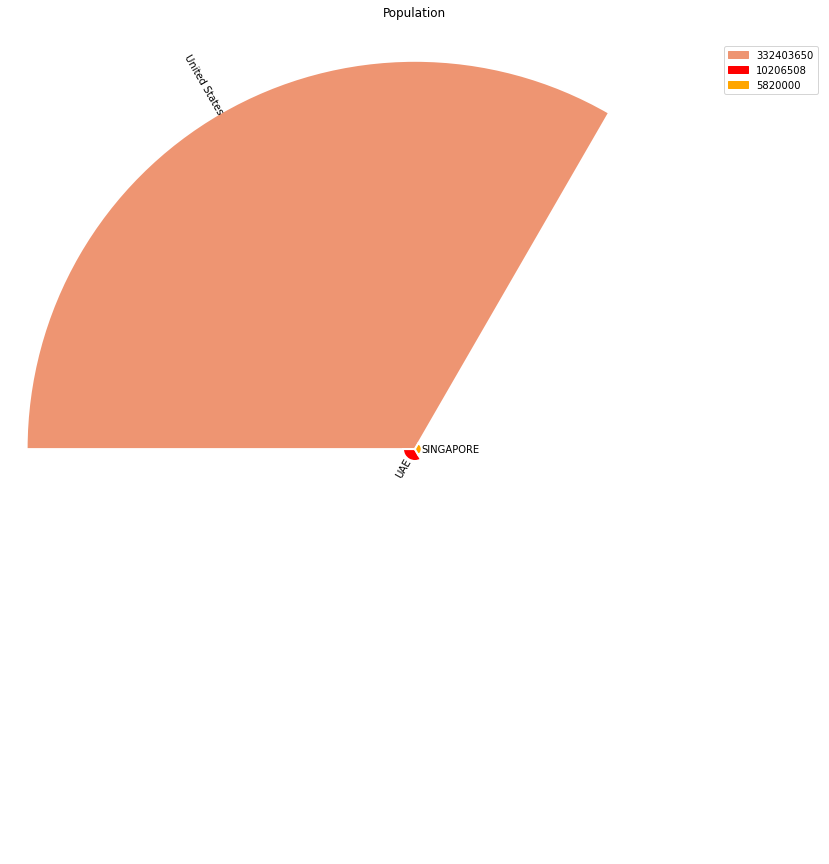

In [51]:
# Set the coordinates limits
upperLimit = 100
lowerLimit = 50

# Compute max and min in the dataset
max = df['Value'].max()

slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# initialize the figure
plt.figure(figsize=(15,15))
ax = plt.subplot(111, polar=True)
plt.axis('off')
plt.title("Population")

# Creating legend with color box
us = mpatches.Patch(color='#EE9572', label='332403650')
uae = mpatches.Patch(color='red', label='10206508')
sg = mpatches.Patch(color='orange', label='5820000')
plt.legend(handles=[us,uae,sg])

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    #color="#61a4b2",
    color=['#EE9572','red','orange'],
)

# little space between the bar and the label
labelPadding = 20

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["Name"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
    
    

# Polarity bar chart 

Negative = -1 , Neutral = 0 , Positive = 1 


Text(0.5, 1.0, 'SINGAPORE')

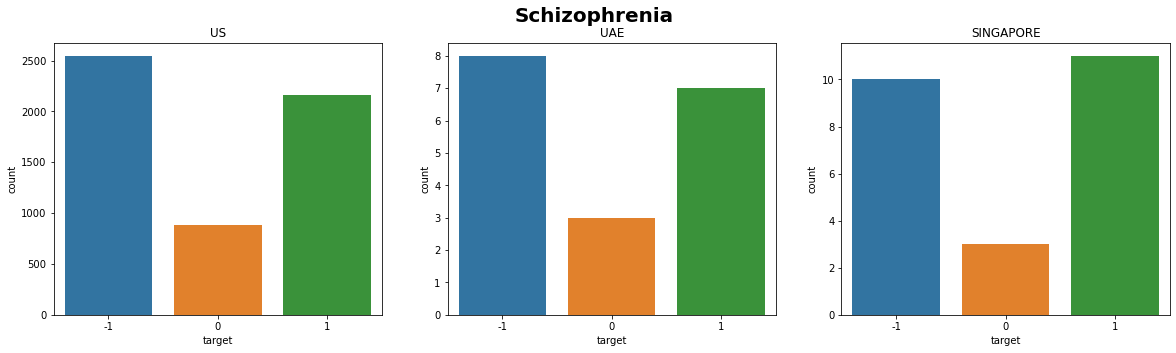

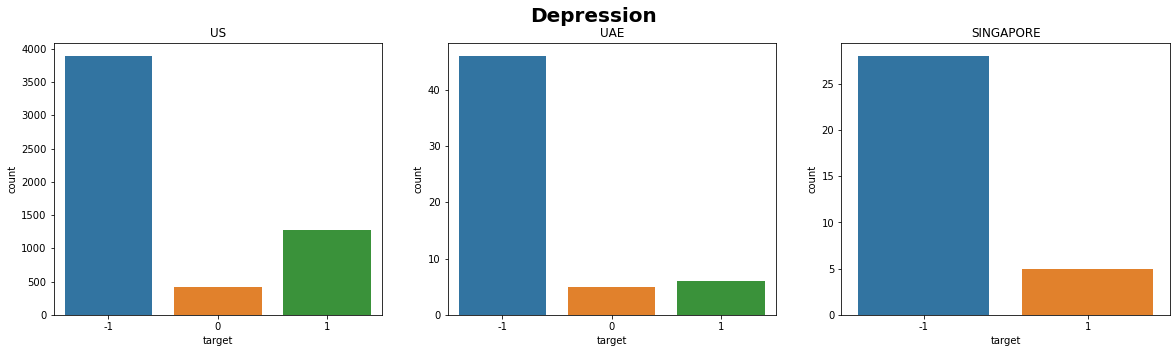

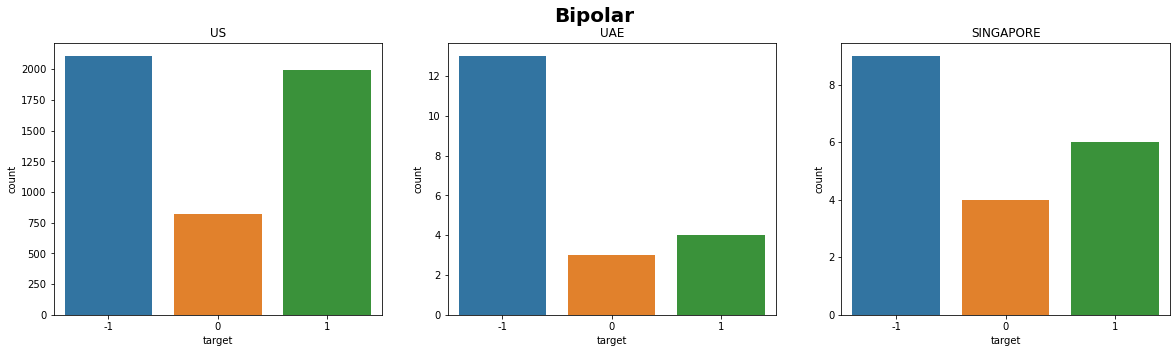

In [52]:
print("Negative = -1 , Neutral = 0 , Positive = 1 ")
#Schizophrenia
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("Schizophrenia",size=20,fontweight = "bold")
sns.countplot(ax=ax1, x='target', data = s)
ax1.set_title("US")
sns.countplot(ax=ax2, x='target', data = suae)
ax2.set_title("UAE")
sns.countplot(ax=ax3, x='target', data = ssg)
ax3.set_title("SINGAPORE")

#Depression
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("Depression",size=20,fontweight = "bold")
sns.countplot(ax=ax1, x='target', data = d)
ax1.set_title("US")
sns.countplot(ax=ax2, x='target', data = duae)
ax2.set_title("UAE")
sns.countplot(ax=ax3, x='target', data = dsg)
ax3.set_title("SINGAPORE")

#Bipolar
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("Bipolar",size=20,fontweight = "bold")
sns.countplot(ax=ax1, x='target', data = b)
ax1.set_title("US")
sns.countplot(ax=ax2, x='target', data = buae)
ax2.set_title("UAE")
sns.countplot(ax=ax3, x='target', data = bsg)
ax3.set_title("SINGAPORE")

# Line chart 

Text(0.5, 1.0, 'Singapore')

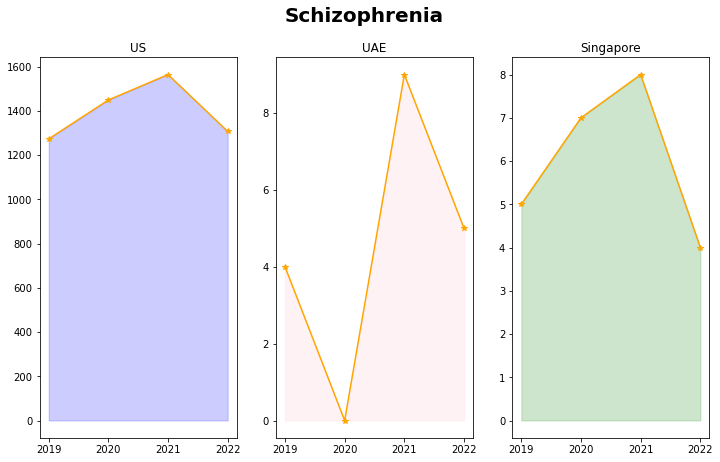

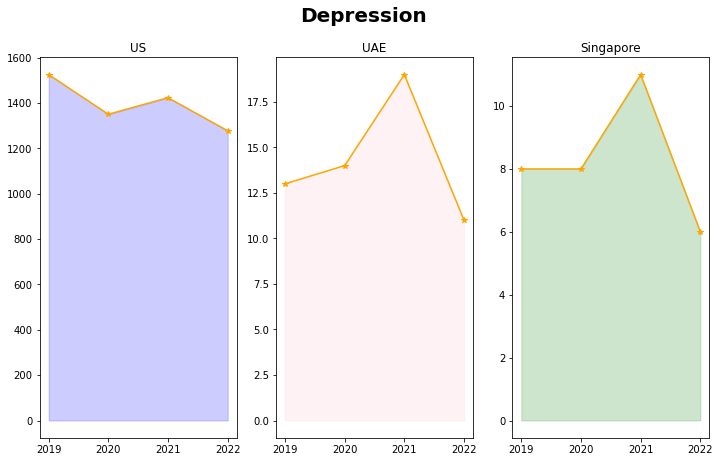

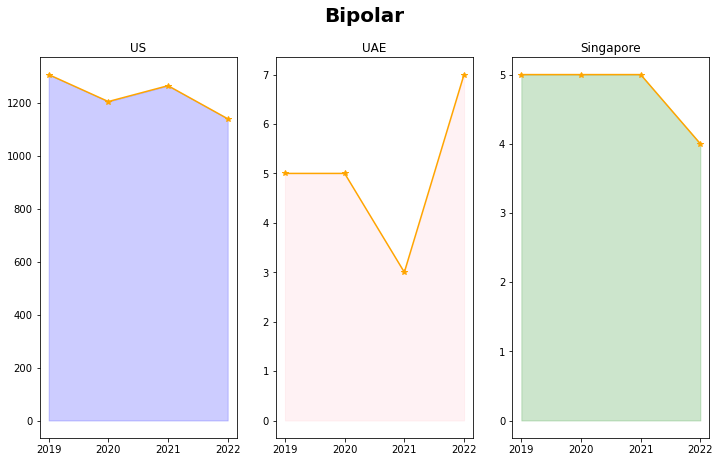

In [53]:
#Comparing every Mental health with 3 countries

#Schizophrenia visualization
plt.rcParams["figure.figsize"] = (12,7)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.plot(year, ss, color="orange" , marker = "*")
ax1.fill_between( year, ss, color="blue", alpha=0.2)

ax2.plot(year, s1, color="orange", marker = "*")
ax2.fill_between( year, s1, color="pink", alpha=0.2)

ax3.plot(year, s2, color="orange", marker = "*")
ax3.fill_between( year, s2, color="green", alpha=0.2)
fig.suptitle("Schizophrenia",size=20,fontweight = "bold")
ax1.set_title("US")
ax2.set_title("UAE")
ax3.set_title("Singapore")

#Depression visualization
plt.rcParams["figure.figsize"] = (12,7)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.plot(year, dd, color="orange", marker = "*")
ax1.fill_between( year, dd, color="blue", alpha=0.2)

ax2.plot(year, d1, color="orange", marker = "*")
ax2.fill_between( year, d1, color="pink", alpha=0.2)

ax3.plot(year, d2, color="orange", marker = "*")
ax3.fill_between( year, d2, color="green", alpha=0.2)
fig.suptitle("Depression",size=20,fontweight = "bold")
ax1.set_title("US")
ax2.set_title("UAE")
ax3.set_title("Singapore")

#Bipolar visualization

plt.rcParams["figure.figsize"] = (12,7)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.plot(year, bb, color="orange", marker = "*")
ax1.fill_between( year, bb, color="blue", alpha=0.2)

ax2.plot(year, b1, color="orange", marker = "*")
ax2.fill_between( year, b1, color="pink", alpha=0.2)


ax3.plot(year, b2, color="orange", marker = "*")
ax3.fill_between( year, b2, color="green", alpha=0.2)
fig.suptitle("Bipolar",size=20,fontweight = "bold")
ax1.set_title("US")
ax2.set_title("UAE")
ax3.set_title("Singapore")

# WordCloud of all files 

SCHIZOPHRENIA


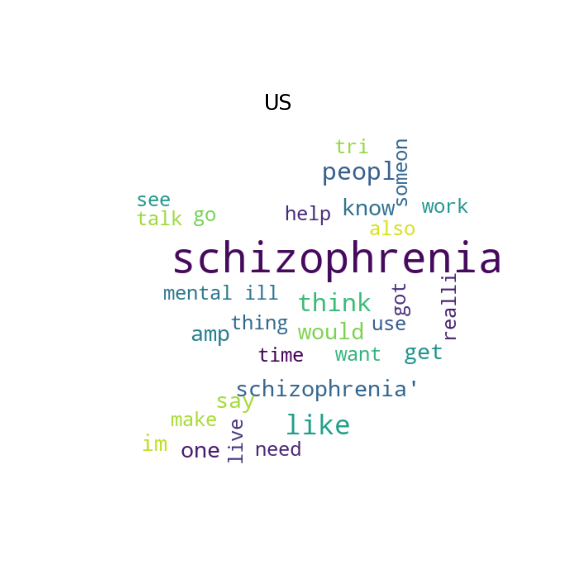

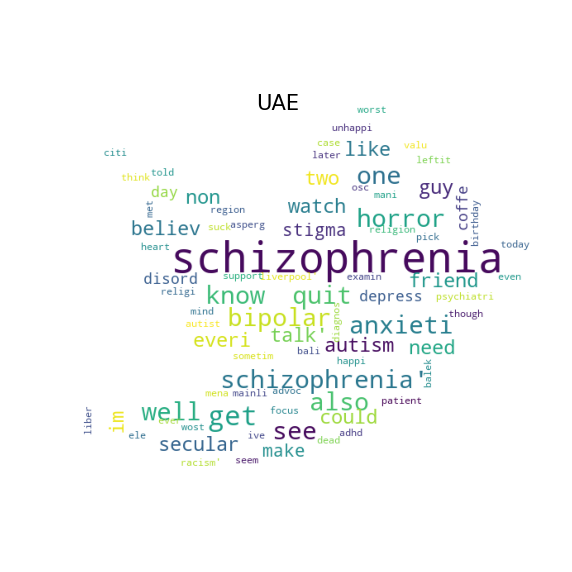

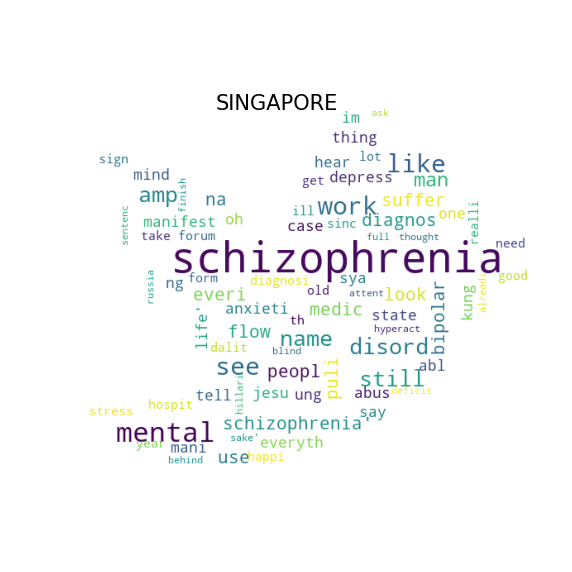

DEPRESSION


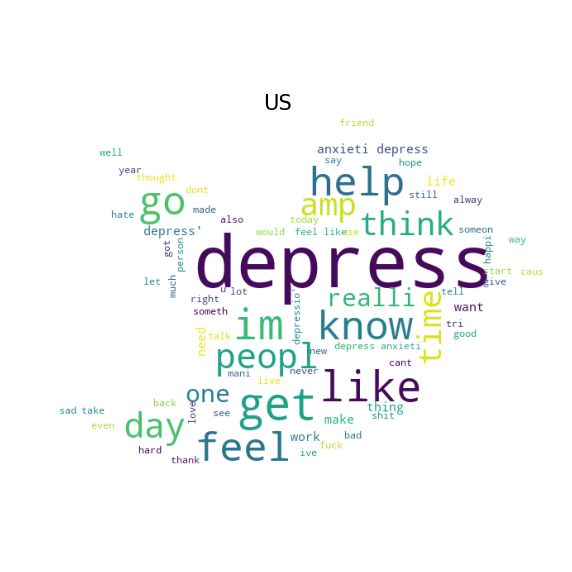

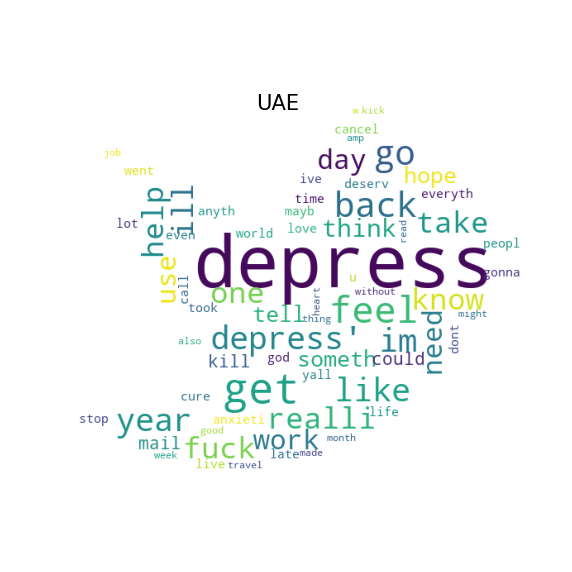

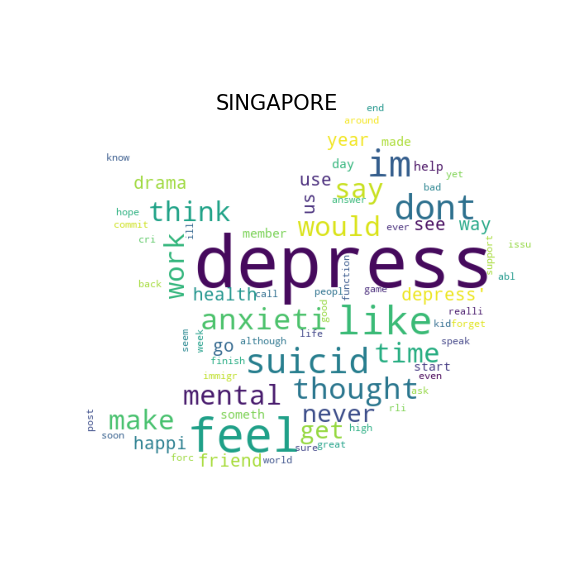

BIPOLAR


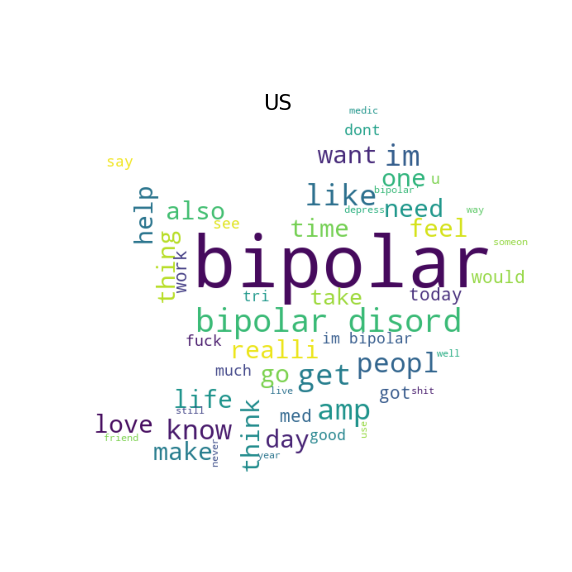

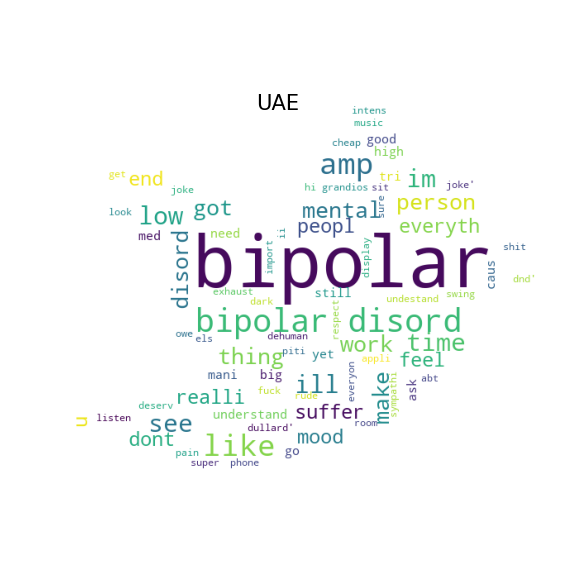

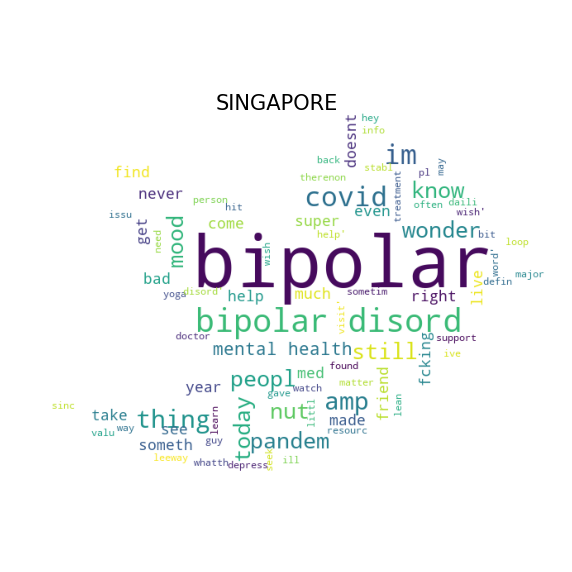

In [45]:
## wordcloud
print("SCHIZOPHRENIA")
show_wordcloud(d1, 'US')  
show_wordcloud(d2, 'UAE') 
show_wordcloud(d3, 'SINGAPORE') 

print("DEPRESSION")
show_wordcloud((d4), 'US')  
show_wordcloud(d5, 'UAE') 
show_wordcloud(d6, 'SINGAPORE') 

print("BIPOLAR")
show_wordcloud(d7, 'US')  
show_wordcloud(d8, 'UAE') 
show_wordcloud(d9, 'SINGAPORE') 

# Wordcloud (US-tweets of specific users)

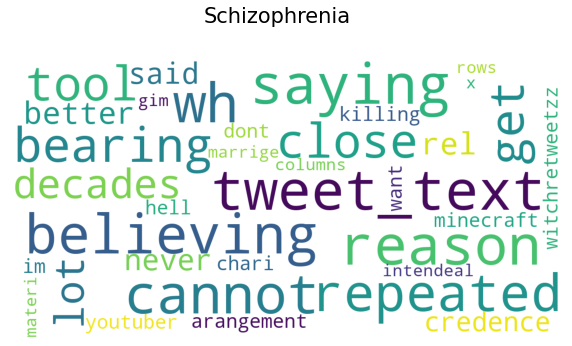

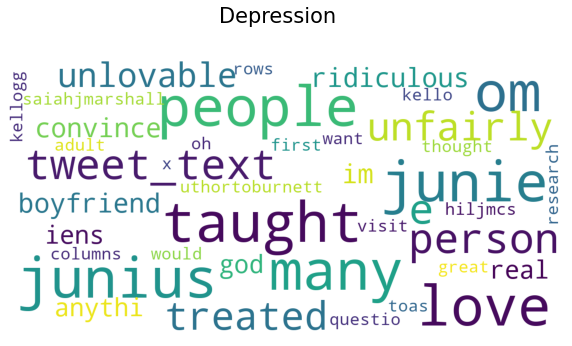

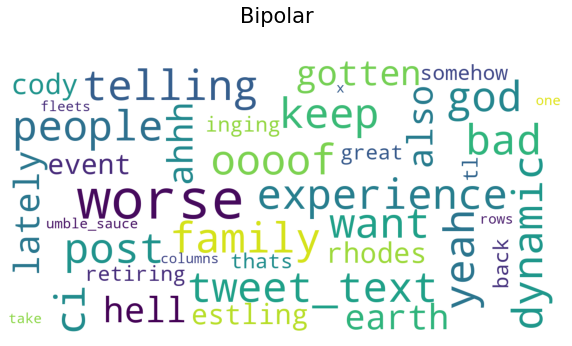

In [55]:
# tweets of selected people who had mental health problem 
show_wordcloud(df_sch, 'Schizophrenia')  
show_wordcloud(df_dep, 'Depression') 
show_wordcloud(df_bip, 'Bipolar') 

# Donut chart

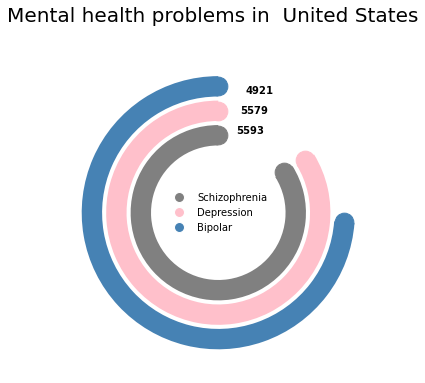

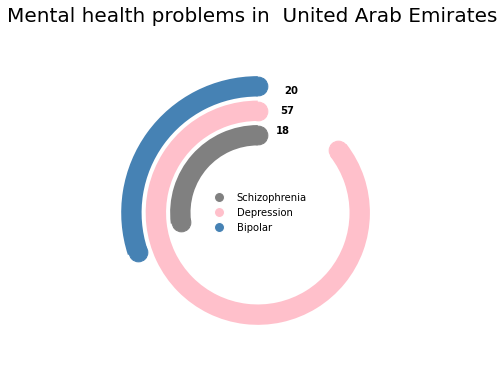

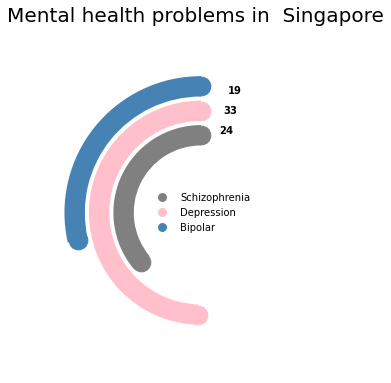

In [56]:
## donut 
donut([len(s),len(d),len(b)],"Mental health problems in  United States", 10000)
donut([len(suae),len(duae),len(buae)],"Mental health problems in  United Arab Emirates", 100)
donut([len(ssg),len(dsg),len(bsg)],"Mental health problems in  Singapore", 100)

# Pie chart

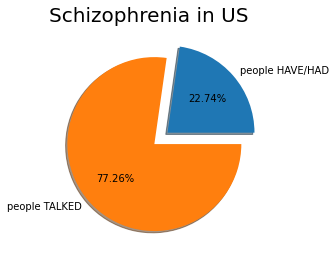

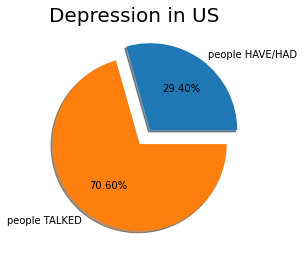

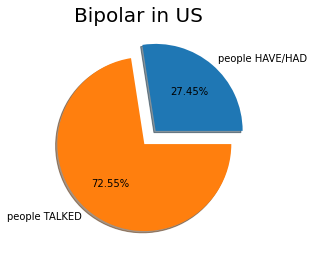

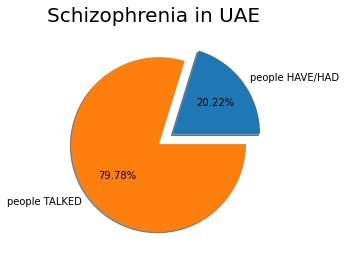

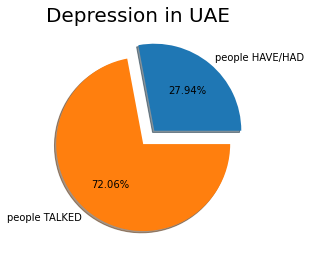

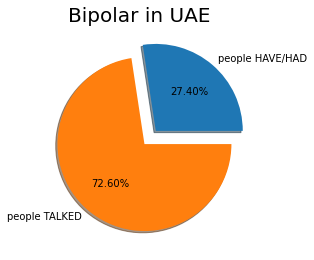

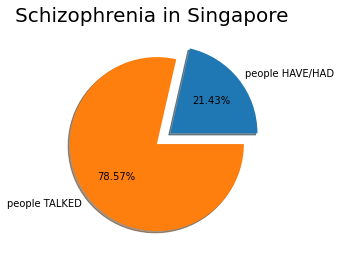

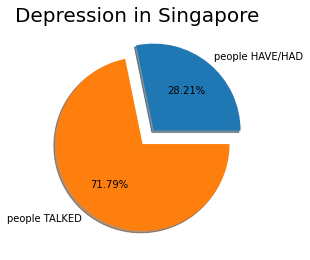

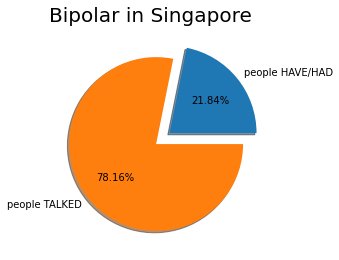

In [32]:
## pie 
pie(pie_s,"Schizophrenia in US")
pie(pie_d,"Depression in US")
pie(pie_b,"Bipolar in US")

pie(pie_suae,"Schizophrenia in UAE")
pie(pie_duae,"Depression in UAE")
pie(pie_buae,"Bipolar in UAE")

pie(pie_ssg,"Schizophrenia in Singapore")
pie(pie_dsg,"Depression in Singapore")
pie(pie_bsg,"Bipolar in Singapore")

# Area chart for Covid-19 cases

Text(0.5, 1.0, 'Singapore')

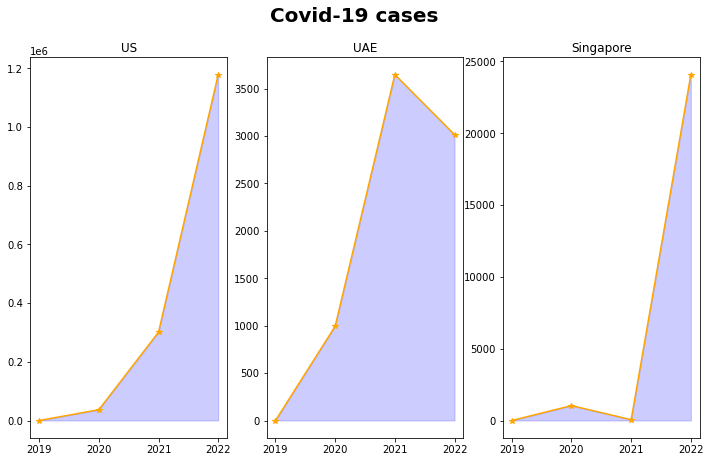

In [20]:
#Schizophrenia visualization
plt.rcParams["figure.figsize"] = (12,7)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.plot(year, cases_us,   color="orange" , marker = "*")
ax1.fill_between( year, cases_us, color="blue", alpha=0.2)

ax2.plot(year, cases_uae,   color="orange" , marker = "*")
ax2.fill_between( year, cases_uae, color="blue", alpha=0.2)

ax3.plot(year, cases_sg,   color="orange" , marker = "*")
ax3.fill_between( year, cases_sg, color="blue", alpha=0.2)
fig.suptitle("Covid-19 cases",size=20,fontweight = "bold")
ax1.set_title("US")
ax2.set_title("UAE")
ax3.set_title("Singapore")


# Line chart for comparison 

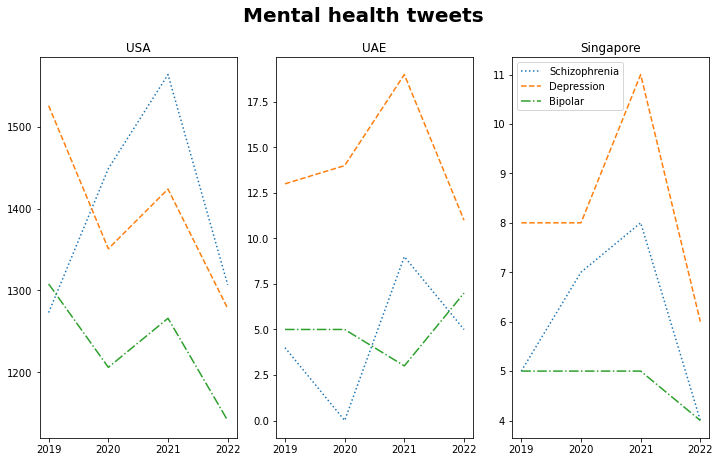

In [58]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
ax1.plot( year,ss, label = "Schizophrenia", linestyle="dotted")
ax1.plot( year,dd, label = "Depression", linestyle="dashed")
ax1.plot( year,bb, label = "Bipolar", linestyle="dashdot")
ax1.set_title("USA")

ax2.plot( year,s1, label = "Schizophrenia", linestyle="dotted")
ax2.plot( year,d1, label = "Depression", linestyle="dashed")
ax2.plot( year,b1, label = "Bipolar", linestyle="dashdot")
ax2.set_title("UAE")

ax3.plot( year,s2, label = "Schizophrenia", linestyle="dotted")
ax3.plot( year,d2, label = "Depression", linestyle="dashed")
ax3.plot( year,b2, label = "Bipolar", linestyle="dashdot")
ax3.set_title("Singapore")

fig.suptitle("Mental health tweets",size=20,fontweight = "bold")
plt.legend()
plt.show()

# Line chart of comparison with COVID-19 

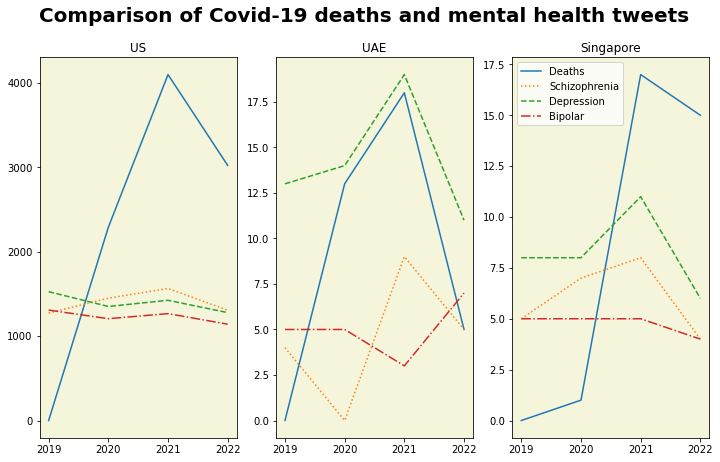

In [59]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
ax1.plot( year,d_us, label = "Deaths", linestyle="solid")
ax1.plot( year,ss, label = "Schizophrenia", linestyle="dotted")
ax1.plot( year,dd, label = "Depression", linestyle="dashed")
ax1.plot( year,bb, label = "Bipolar", linestyle="dashdot")
ax1.set_facecolor('#F5F5DC')
ax1.set_title("US")

ax2.plot( year,d_uae, label = "Deaths",linestyle="solid")
ax2.plot( year,s1, label = "Schizophrenia", linestyle="dotted")
ax2.plot( year,d1, label = "Depression", linestyle="dashed")
ax2.plot( year,b1, label = "Bipolar",linestyle="dashdot")
ax2.set_facecolor('#F5F5DC')
ax2.set_title("UAE")

ax3.plot( year,d_sg, label = "Deaths",linestyle="solid")
ax3.plot( year,s2, label = "Schizophrenia", linestyle="dotted")
ax3.plot( year,d2, label = "Depression", linestyle="dashed")
ax3.plot( year,b2, label = "Bipolar",linestyle="dashdot")
ax3.set_facecolor('#F5F5DC')
ax3.set_title("Singapore")

fig.suptitle("Comparison of Covid-19 deaths and mental health tweets",size=20,fontweight = "bold")
plt.legend()
plt.show()

# Scatter plot of total tweets 

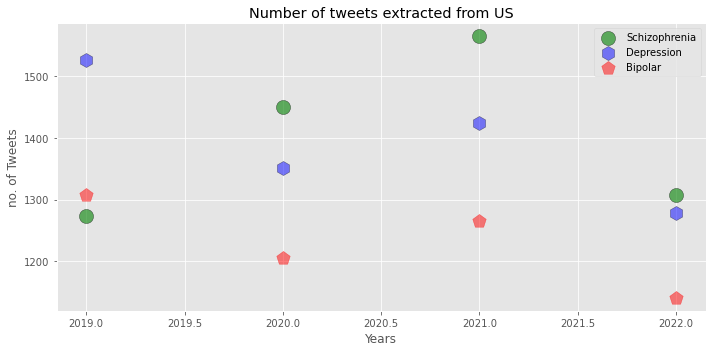

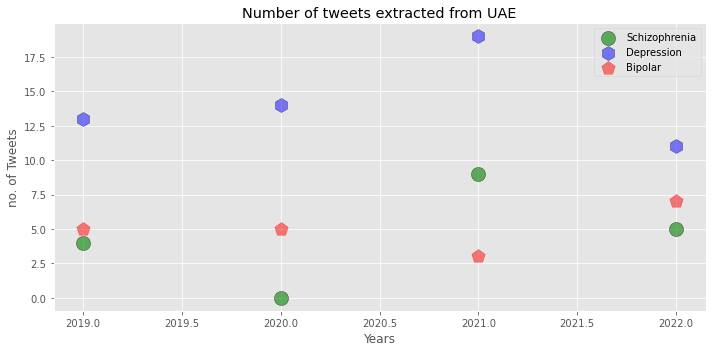

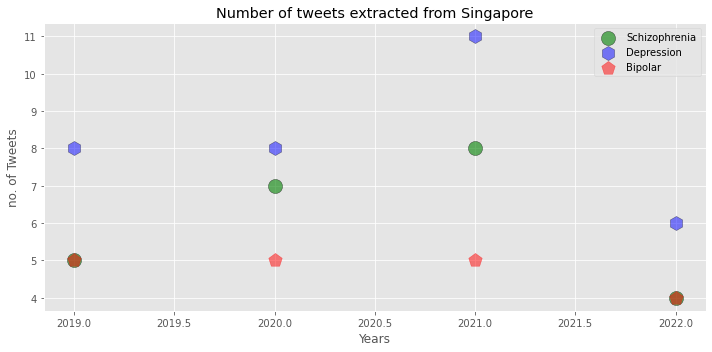

In [60]:
scatter(ss,dd,bb,"Number of tweets extracted from US")
scatter(s1,d1,b1,"Number of tweets extracted from UAE")
scatter(s2,d2,b2,"Number of tweets extracted from Singapore")

# Graph for word count

### US

In [52]:
print('Schizophrenia positive')
gen_pyldavis(pos_tokens)        # Generate the graph for positive tokens

Schizophrenia positive


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.390122  0.379706       1        1  35.661772
4      0.160582 -0.431374       2        1   8.867731
14    -0.366348 -0.268727       3        1   7.359578
1     -0.158253  0.390822       4        1   5.773766
3      0.268532 -0.230108       5        1   4.539448
2      0.352451 -0.087125       6        1   4.126445
18     0.068592  0.328220       7        1   3.653957
6     -0.125538 -0.330290       8        1   3.545742
15    -0.369860  0.118899       9        1   3.388387
9      0.241451  0.163018      10        1   3.257863
10     0.260463  0.017632      11        1   2.789129
11     0.026812  0.186891      12        1   2.723650
13    -0.276631 -0.114527      13        1   2.588267
12    -0.144820  0.200172      14        1   2.441762
8      0.045197 -0.243599      15        1   2.146170
0     -0.238017  0.102626      16        1   2.016328
17    -0.044255 -0.139219      17        1   1.873533
7     -0.147250 -0.023218      18        1   1.493682
19     0.045005 -0.045241      19        1   1.101885
16     0.011767  0.025440      20        1   0.650907, topic_info=               Term         Freq        Total Category  logprob  loglift
16    schizophrenia  3251.000000  3251.000000  Default  30.0000  30.0000
11             like  1103.000000  1103.000000  Default  29.0000  29.0000
853           video   266.000000   266.000000  Default  28.0000  28.0000
112             amp   259.000000   259.000000  Default  27.0000  27.0000
122          mental   326.000000   326.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
1869         almost     0.028039     1.164551  Topic20  -9.1124   1.3081
1746          brain     0.028040     1.164782  Topic20  -9.1124   1.3079
1092          induc     0.028039     1.164537  Topic20  -9.1124   1.3081
1175         recogn     0.028039     1.164499  Topic20  -9.1124   1.3081
1001       paranoid     0.028039     1.164766  Topic20  -9.1124   1.3079

[705 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
146      10  0.828759     abil
170       3  0.971224      abl
510       5  0.959722  absolut
109       8  0.917328     abus
745       7  0.962812   accept
...     ...       ...      ...
882       9  0.894248       yo
369      12  0.970374    young
718      18  0.495994     youv
833       3  0.973917       yr
774      13  0.665642     zero

[497 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 15, 2, 4, 3, 19, 7, 16, 10, 11, 12, 14, 13, 9, 1, 18, 8, 20, 17])

In [53]:
print('Schizophrenia neutral')
gen_pyldavis(neu_tokens)        # Generate the graph for neutral tokens

Schizophrenia neutral


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.377016  0.320371       1        1  26.889996
5      0.101332 -0.394509       2        1   9.602678
11    -0.291796 -0.245310       3        1   7.776708
17    -0.163815  0.337471       4        1   7.189120
2      0.288624 -0.205897       5        1   6.475265
13     0.259094 -0.100175       6        1   5.035214
18     0.063665  0.300895       7        1   5.017918
10    -0.120248 -0.238889       8        1   4.121068
1     -0.296529  0.080415       9        1   3.523925
3      0.171745  0.137047      10        1   3.405628
9      0.199094  0.021608      11        1   3.096954
7     -0.014185  0.174988      12        1   2.892504
16    -0.239028 -0.040674      13        1   2.859711
4     -0.172061  0.150389      14        1   2.736261
14     0.020850 -0.200143      15        1   2.638445
12    -0.105758  0.042842      16        1   1.879366
15    -0.002456 -0.075574      17        1   1.402502
8     -0.104552 -0.063355      18        1   1.385673
19    -0.014050  0.001956      19        1   1.106818
6      0.043060 -0.003457      20        1   0.964246, topic_info=               Term         Freq        Total Category  logprob  loglift
2     schizophrenia  1304.000000  1304.000000  Default  30.0000  30.0000
96            think    97.000000    97.000000  Default  29.0000  29.0000
134    schizophreni   116.000000   116.000000  Default  28.0000  28.0000
385             get    92.000000    92.000000  Default  27.0000  27.0000
160           peopl   126.000000   126.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
1835          scare     0.024350     1.022017  Topic20  -8.3403   0.9046
958            wron     0.024349     1.021978  Topic20  -8.3403   0.9046
957           theyr     0.024349     1.021999  Topic20  -8.3403   0.9046
1764            she     0.024349     1.022002  Topic20  -8.3403   0.9046
2568        sentenc     0.024349     1.022001  Topic20  -8.3403   0.9046

[709 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
4         7  0.447858     abl
4        17  0.447858     abl
86       12  0.763807  accord
163       6  0.966417  actual
619       9  0.832507  addict
...     ...       ...     ...
56       17  0.814549      yo
289      13  0.789826   young
188      11  0.824062    your
363      18  0.544954   youth
591       9  0.956936  youtub

[476 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 12, 18, 3, 14, 19, 11, 2, 4, 10, 8, 17, 5, 15, 13, 16, 9, 20, 7])

In [54]:
print('Schizophrenia negative')
gen_pyldavis(neg_tokens)        # Generate the graph for negative tokens

Schizophrenia negative


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.381397  0.377773       1        1  26.742855
11     0.157078 -0.446025       2        1   9.973899
16    -0.374981 -0.282712       3        1   8.414790
10    -0.144239  0.412548       4        1   6.128737
14     0.303376 -0.263464       5        1   5.482553
18     0.393033 -0.099544       6        1   5.466498
12     0.083320  0.379283       7        1   5.444483
17    -0.152538 -0.380753       8        1   5.104418
6     -0.392523  0.106256       9        1   3.635540
15     0.240065  0.167773      10        1   3.270234
1      0.295547  0.025188      11        1   2.996371
8      0.013349  0.193347      12        1   2.705633
13    -0.299445 -0.095031      13        1   2.685785
5     -0.234235  0.237392      14        1   2.649453
7      0.021885 -0.255588      15        1   2.408449
9     -0.183396  0.110856      16        1   2.058040
0     -0.021075 -0.139708      17        1   1.785457
19    -0.148715 -0.030328      18        1   1.275283
2     -0.005978 -0.014133      19        1   1.075851
4      0.068073 -0.003130      20        1   0.695673, topic_info=               Term         Freq        Total Category  logprob  loglift
17    schizophrenia  3748.000000  3748.000000  Default  30.0000  30.0000
78           mental   671.000000   671.000000  Default  29.0000  29.0000
75              ill   556.000000   556.000000  Default  28.0000  28.0000
244             amp   416.000000   416.000000  Default  27.0000  27.0000
4           depress   398.000000   398.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
3736            sit     0.031856     1.204398  Topic20  -9.2416   1.3355
1378         wonder     0.031856     1.204510  Topic20  -9.2415   1.3354
1237           hous     0.031856     1.204476  Topic20  -9.2416   1.3355
964           treat     0.031856     1.204624  Topic20  -9.2415   1.3353
1187          earli     0.031856     1.204568  Topic20  -9.2416   1.3354

[672 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
552       4  0.975780        abl
370       2  0.976339    absolut
475       8  0.984969       abus
601      13  0.963476     accept
862      13  0.655285      accus
...     ...       ...        ...
748       2  0.979881       yeah
161       3  0.995275       year
354       6  0.909346  yesterday
911       7  0.961013      young
162      13  0.908357     youtub

[534 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 12, 17, 11, 15, 19, 13, 18, 7, 16, 2, 9, 14, 6, 8, 10, 1, 20, 3, 5])

In [55]:
print('Depression positive')
gen_pyldavis(dep_pos_tokens)        # Generate the graph for positive tokens

Depression positive


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.396874  0.372748       1        1  48.385491
3      0.143862 -0.423962       2        1   8.425784
14    -0.342541 -0.265571       3        1   6.356240
9     -0.125554  0.394889       4        1   6.324134
1      0.249492 -0.221483       5        1   3.833534
8      0.335263 -0.079364       6        1   3.677419
6      0.067321  0.274729       7        1   2.844686
18    -0.125267 -0.274563       8        1   2.660334
7     -0.299373  0.088091       9        1   2.364866
12     0.177099  0.133924      10        1   2.254089
17     0.216219  0.016511      11        1   2.099813
11    -0.016981  0.161812      12        1   1.990016
16    -0.273478 -0.061580      13        1   1.882348
15    -0.192334  0.189870      14        1   1.762445
0      0.017121 -0.195302      15        1   1.461093
10    -0.145313  0.056510      16        1   1.447483
19    -0.012747 -0.110129      17        1   0.863363
13    -0.088898 -0.040085      18        1   0.716090
5      0.007335 -0.023414      19        1   0.454719
4      0.011898  0.006368      20        1   0.196052, topic_info=         Term        Freq        Total Category  logprob  loglift
4     depress  1761.00000  1761.000000  Default  30.0000  30.0000
0         amp   162.00000   162.000000  Default  29.0000  29.0000
350     thing   192.00000   192.000000  Default  28.0000  28.0000
25      great   216.00000   216.000000  Default  27.0000  27.0000
133     think   187.00000   187.000000  Default  26.0000  26.0000
...       ...         ...          ...      ...      ...      ...
1320     send     0.00935     0.931724  Topic20  -8.4598   1.6329
999       new     0.00935     0.931776  Topic20  -8.4598   1.6328
841       run     0.00935     0.931628  Topic20  -8.4598   1.6330
805    happen     0.00935     0.931716  Topic20  -8.4598   1.6329
803       bit     0.00935     0.931713  Topic20  -8.4598   1.6329

[748 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
83        8  0.951652     abl
318      19  0.788765  accept
595      14  0.972342  actual
451       8  0.935440  addict
158       4  0.970096     ago
...     ...       ...     ...
124       6  0.983971      ye
550      14  0.745587    yeah
111       2  0.958240    year
111       4  0.032760    year
351       2  0.990397    your

[409 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 15, 10, 2, 9, 7, 19, 8, 13, 18, 12, 17, 16, 1, 11, 20, 14, 6, 5])

In [56]:
print('Depression neutral')
gen_pyldavis(dep_neu_tokens)        # Generate the graph for neutral tokens

Depression neutral


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.374122 -0.173209       1        1  19.493031
13    -0.345627  0.027407       2        1  12.604016
6     -0.085844 -0.231469       3        1   9.568144
14     0.014112 -0.281075       4        1   7.226018
19     0.105747  0.297985       5        1   6.636119
0     -0.097746  0.299373       6        1   6.223078
3     -0.193671  0.186381       7        1   6.186578
16    -0.186406 -0.165813       8        1   5.612006
5      0.144361 -0.265906       9        1   4.708192
15     0.217503 -0.125280      10        1   4.153537
11     0.281051  0.001713      11        1   3.326542
10     0.201212  0.121380      12        1   2.689580
1     -0.095905  0.032011      13        1   2.560436
2      0.102307  0.057463      14        1   1.934805
12     0.023193  0.136202      15        1   1.846552
17     0.053268  0.085232      16        1   1.809435
4      0.058799 -0.034236      17        1   1.558833
9      0.101478  0.002961      18        1   1.431790
18     0.037969  0.013694      19        1   0.238671
8      0.038320  0.015187      20        1   0.192636, topic_info=         Term        Freq       Total Category  logprob  loglift
34  depressio   94.000000   94.000000  Default  30.0000  30.0000
6     depress  415.000000  415.000000  Default  29.0000  29.0000
78       cure   54.000000   54.000000  Default  28.0000  28.0000
17        day   43.000000   43.000000  Default  27.0000  27.0000
22         im   50.000000   50.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
21       help    0.005401   58.426360  Topic20  -7.5466  -3.0368
22         im    0.005401   50.672320  Topic20  -7.5466  -2.8945
23       isnt    0.005401    9.342893  Topic20  -7.5466  -1.2037
24        ive    0.005401   11.260832  Topic20  -7.5466  -1.3904
25        joy    0.005401    1.772096  Topic20  -7.5466   0.4588

[756 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
173       2  0.840970        abl
188      12  0.928395     actual
591       7  0.736355    advisor
115       5  0.801771        ago
307       2  0.864795     almost
...     ...       ...        ...
168       5  0.963101       year
280       2  0.744153  yesterday
457       4  0.951037         yo
186       2  0.925675       your
187       1  0.731065       youv

[447 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 14, 7, 15, 20, 1, 4, 17, 6, 16, 12, 11, 2, 3, 13, 18, 5, 10, 19, 9])

In [57]:
print('Depression negative')
gen_pyldavis(dep_neg_tokens)        # Generate the graph for negative tokens

Depression negative


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12    -0.473321 -0.244605       1        1  31.827024
11    -0.474330  0.090453       2        1  12.958394
2     -0.169397 -0.401940       3        1   8.200975
7      0.037135 -0.420258       4        1   6.226410
1      0.129057  0.425018       5        1   5.037307
6     -0.175404  0.369608       6        1   4.211073
15    -0.284995  0.197582       7        1   4.136719
3     -0.212572 -0.182908       8        1   3.771923
5      0.162599 -0.292530       9        1   3.584959
4      0.322458 -0.229320      10        1   3.439477
14     0.389245 -0.052682      11        1   3.271066
8      0.338434  0.169079      12        1   2.582884
19    -0.143373 -0.046689      13        1   2.582818
17    -0.102857  0.140250      14        1   2.455931
9      0.018736  0.264386      15        1   2.212969
16     0.182801  0.204558      16        1   1.542025
13     0.095751 -0.085534      17        1   0.959594
0      0.192697  0.029482      18        1   0.649920
18     0.096730  0.043706      19        1   0.309996
10     0.070607  0.022345      20        1   0.038536, topic_info=       Term         Freq        Total Category  logprob  loglift
0   depress  6774.000000  6774.000000  Default  30.0000  30.0000
10  anxieti   950.000000   950.000000  Default  29.0000  29.0000
39     like   867.000000   867.000000  Default  28.0000  28.0000
35     feel   800.000000   800.000000  Default  27.0000  27.0000
58      amp   429.000000   429.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
24     away     0.003293   138.872062  Topic20  -8.8387  -2.7883
26    cloth     0.003293    11.996767  Topic20  -8.8387  -0.3394
27     dont     0.003293   394.907798  Topic20  -8.8387  -3.8334
28     know     0.003293   558.507380  Topic20  -8.8387  -4.1800
29      put     0.003293   117.406637  Topic20  -8.8387  -2.6204

[764 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
284       2  0.990473        abl
161      15  0.989939       abus
102       4  0.941501      accid
343       4  0.965085     addict
308      13  0.937643      adult
...     ...       ...        ...
444       1  0.998468       year
97       10  0.918819  yesterday
325      15  0.949100      young
690      14  0.685195       youv
555       8  0.944647     zoloft

[444 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 12, 3, 8, 2, 7, 16, 4, 6, 5, 15, 9, 20, 18, 10, 17, 14, 1, 19, 11])

In [58]:
print('Bipolar positive')
gen_pyldavis(bip_pos_tokens)        # Generate the graph for positive tokens

Bipolar positive


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.397340  0.379936       1        1  42.212197
10     0.155651 -0.431521       2        1   8.465283
7     -0.358687 -0.265598       3        1   6.716834
6     -0.165974  0.374487       4        1   4.985565
5      0.271360 -0.237177       5        1   4.534719
11     0.354630 -0.087905       6        1   4.179902
15     0.069392  0.347546       7        1   3.989691
0     -0.140222 -0.332284       8        1   3.687141
19    -0.343611  0.109664       9        1   3.221163
16     0.206496  0.158872      10        1   2.710455
9      0.257865  0.027135      11        1   2.420432
17     0.000996  0.199377      12        1   2.292956
4     -0.279242 -0.087437      13        1   2.008241
18    -0.198336  0.183545      14        1   2.002605
13     0.010819 -0.243509      15        1   1.909609
8     -0.100546  0.056567      16        1   1.391606
12    -0.032773 -0.098876      17        1   1.141839
2     -0.167134 -0.013985      18        1   0.978676
14     0.072239 -0.042516      19        1   0.927531
3     -0.010265  0.003680      20        1   0.223554, topic_info=           Term         Freq        Total Category  logprob  loglift
2       bipolar  2938.000000  2938.000000  Default  30.0000  30.0000
215        love   256.000000   256.000000  Default  29.0000  29.0000
113         amp   358.000000   358.000000  Default  28.0000  28.0000
290       world   195.000000   195.000000  Default  27.0000  27.0000
86         feel   174.000000   174.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
4760       loco     0.012250     1.040921  Topic20  -8.7097   1.6610
4762  reconozco     0.012250     1.040921  Topic20  -8.7097   1.6610
1457     stream     0.012251     1.040987  Topic20  -8.7097   1.6609
3295       pasa     0.012250     1.040924  Topic20  -8.7097   1.6610
3357         el     0.012250     1.040923  Topic20  -8.7097   1.6610

[743 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
558       8  0.412635  abilifi
454      14  0.899841  absolut
45       10  0.967654   accept
158       9  0.954615      act
485      12  0.877500    activ
...     ...       ...      ...
446       9  0.921456       yo
154      11  0.798086    youll
249      19  0.952803     your
44        2  0.974107       yr
526       8  0.428034   zoloft

[429 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 11, 8, 7, 6, 12, 16, 1, 20, 17, 10, 18, 5, 19, 14, 9, 13, 3, 15, 4])

In [59]:
print('Bipolar neutral')
gen_pyldavis(bip_neu_tokens)        # Generate the graph for neutral tokens

Bipolar neutral


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13     0.374021  0.338335       1        1  40.720128
19     0.073442 -0.316348       2        1   7.120758
4     -0.329112 -0.188431       3        1   6.402439
0     -0.156755  0.266727       4        1   5.719939
10     0.209581 -0.197185       5        1   5.267830
8      0.258333 -0.070400       6        1   4.407475
2      0.040874  0.250713       7        1   3.625180
6     -0.120251 -0.229735       8        1   3.618761
7     -0.244434  0.079513       9        1   3.271127
9      0.112637  0.108759      10        1   3.152168
18     0.175746  0.028971      11        1   2.607298
16    -0.022706  0.147316      12        1   2.361881
12    -0.157142 -0.032513      13        1   2.247413
1     -0.118127  0.084895      14        1   2.150178
3     -0.009699 -0.148066      15        1   2.107302
17    -0.068308  0.022682      16        1   1.585693
14    -0.010231 -0.064786      17        1   1.117925
5     -0.060363 -0.046084      18        1   1.045545
11     0.059540 -0.036760      19        1   0.900534
15    -0.007045  0.002400      20        1   0.570425, topic_info=         Term         Freq        Total Category  logprob  loglift
1     bipolar  1304.000000  1304.000000  Default  30.0000  30.0000
4          im   169.000000   169.000000  Default  29.0000  29.0000
390      year    72.000000    72.000000  Default  28.0000  28.0000
128      know    57.000000    57.000000  Default  27.0000  27.0000
5       peopl    79.000000    79.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
714      also     0.015773     0.911815  Topic20  -8.0526   1.1094
1725     head     0.015772     0.911645  Topic20  -8.0527   1.1095
2413     club     0.015772     0.911699  Topic20  -8.0527   1.1095
1006      cuz     0.015772     0.911646  Topic20  -8.0527   1.1095
618    hospit     0.015772     0.911809  Topic20  -8.0527   1.1093

[716 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
222       8  0.818589     act
252       1  0.955621  actual
554       7  0.500490     age
308      16  0.847023     ago
336       5  0.796344   ahora
...     ...       ...     ...
315       6  0.518924   would
93        6  0.938262   write
390       6  0.990506    year
131       1  0.962668      yo
142       4  0.636236  zelena

[321 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 20, 5, 1, 11, 9, 3, 7, 8, 10, 19, 17, 13, 2, 4, 18, 15, 6, 12, 16])

In [60]:
print('Bipolar negative')
gen_pyldavis(bip_neg_tokens)        # Generate the graph for negative tokens

Bipolar negative


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
18    -0.470943 -0.257495       1        1  38.457745
12    -0.472301  0.127330       2        1  16.206027
9     -0.120654 -0.327829       3        1   4.442452
8      0.036880 -0.384184       4        1   3.963730
5      0.122912  0.379127       5        1   3.783022
10    -0.134020  0.330424       6        1   3.589491
16    -0.224211  0.191625       7        1   3.394159
14    -0.178431 -0.171989       8        1   3.363766
4      0.142797 -0.258593       9        1   3.342903
19     0.301421 -0.217844      10        1   2.891670
15     0.351308 -0.045201      11        1   2.799782
13     0.317771  0.172365      12        1   2.793278
0     -0.217214 -0.017620      13        1   2.634731
2     -0.069725  0.087724      14        1   1.978244
6      0.020476  0.237636      15        1   1.567652
1      0.159667  0.179083      16        1   1.424985
3      0.113098 -0.096514      17        1   1.424199
11     0.193210  0.037245      18        1   1.399004
17     0.079560  0.026729      19        1   0.497534
7      0.048398  0.007980      20        1   0.045628, topic_info=        Term         Freq        Total Category  logprob  loglift
16   bipolar  3356.000000  3356.000000  Default    30.00  30.0000
106     take   336.000000   336.000000  Default    29.00  29.0000
58        im   607.000000   607.000000  Default    28.00  28.0000
22      know   520.000000   520.000000  Default    27.00  27.0000
17    disord   950.000000   950.000000  Default    26.00  26.0000
..       ...          ...          ...      ...      ...      ...
25   mainten     0.002984     1.483835  Topic20    -8.61   1.4832
26    opioid     0.002984     1.432738  Topic20    -8.61   1.5182
27     sever     0.002984   118.286262  Topic20    -8.61  -2.8953
28     start     0.002984    52.421685  Topic20    -8.61  -2.0815
29      wife     0.002984    11.858606  Topic20    -8.61  -0.5953

[709 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
670       3  0.987234     abl
390       6  0.960424    abus
64        5  0.894363  action
13        3  0.977037  actual
14        3  0.966799  addict
...     ...       ...     ...
115       6  0.965925     yet
804       8  0.982741      yo
12        8  0.983666    your
389      16  0.980263    youv
272      16  0.898764     yup

[450 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 13, 10, 9, 6, 11, 17, 15, 5, 20, 16, 14, 1, 3, 7, 2, 4, 12, 18, 8])

In [40]:
print('Schizophrenia tweets')
gen_pyldavis(sch_tokens)        # Generate the graph for schizophrenia tokens

Schizophrenia tweets


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
17    -0.179693  0.321365       1        1  14.735146
16     0.103347 -0.339418       2        1  13.943617
9      0.185146  0.244219       3        1   9.472332
6     -0.236094 -0.214218       4        1   8.578185
13    -0.213908  0.124272       5        1   7.302988
19     0.028571  0.206154       6        1   7.137767
12     0.251138 -0.051488       7        1   6.113270
15    -0.210040 -0.049902       8        1   5.166368
8      0.159566  0.088046       9        1   4.773213
7     -0.050350  0.083824      10        1   3.420595
0     -0.060024 -0.165754      11        1   3.241975
1      0.045149 -0.027630      12        1   2.926832
18    -0.122588  0.011200      13        1   2.889518
10     0.048262 -0.108611      14        1   2.679564
5      0.125732 -0.092679      15        1   1.643681
14     0.114910  0.014183      16        1   1.493812
2      0.025259  0.033446      17        1   1.485344
11    -0.007335 -0.054448      18        1   1.401414
4     -0.016359 -0.016894      19        1   1.144804
3      0.009313 -0.005668      20        1   0.449573, topic_info=       Term        Freq       Total Category  logprob  loglift
21      get  271.000000  271.000000  Default  30.0000  30.0000
242    work  222.000000  222.000000  Default  29.0000  29.0000
38     play  205.000000  205.000000  Default  28.0000  28.0000
5      like  163.000000  163.000000  Default  27.0000  27.0000
175    love  139.000000  139.000000  Default  26.0000  26.0000
...     ...         ...         ...      ...      ...      ...
807       n    0.016450    1.677863  Topic20  -8.3031   0.7797
563       u    0.016450    1.678151  Topic20  -8.3031   0.7795
784    told    0.016446    1.675809  Topic20  -8.3033   0.7807
151      go    0.016449  182.797812  Topic20  -8.3032  -3.9112
1140  often    0.016446    1.675721  Topic20  -8.3033   0.7807

[767 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
375       8  0.945709    absolut
118      12  0.877937    account
268       4  0.888769        act
537      15  0.326604     action
65        1  0.844392        add
...     ...       ...        ...
45       11  0.955980       year
492       9  0.844713  yesterday
267       3  0.922933        yet
123       3  0.888797         yo
530       3  0.879214        yup

[327 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 17, 10, 7, 14, 20, 13, 16, 9, 8, 1, 2, 19, 11, 6, 15, 3, 12, 5, 4])

In [41]:
print('Depression tweets')
gen_pyldavis(dep_tokens)        # Generate the graph for Depression tokens

Depression tweets


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
17     0.244200  0.269374       1        1  10.112380
12     0.051807 -0.311852       2        1   9.088851
3     -0.292131 -0.168815       3        1   8.946008
9     -0.149276  0.284668       4        1   8.255827
5      0.214189 -0.226890       5        1   7.904284
18     0.314175 -0.070951       6        1   7.412880
13     0.035901  0.285585       7        1   7.321337
11    -0.121535 -0.242667       8        1   6.254008
2     -0.278882  0.056097       9        1   6.141149
19     0.214615  0.105478      10        1   5.492925
1      0.151671 -0.010782      11        1   3.986634
4      0.019250  0.104427      12        1   3.018853
0     -0.125118 -0.022396      13        1   2.738973
15    -0.133430  0.129846      14        1   2.622906
14     0.005122 -0.122197      15        1   2.535572
10    -0.102075  0.058542      16        1   2.435668
7     -0.003812 -0.060040      17        1   1.958959
16    -0.067919 -0.052171      18        1   1.887563
8      0.038616 -0.005991      19        1   1.735406
6     -0.015368  0.000735      20        1   0.149817, topic_info=         Term        Freq       Total Category  logprob  loglift
17       like  532.000000  532.000000  Default  30.0000  30.0000
91        get  332.000000  332.000000  Default  29.0000  29.0000
25       year  283.000000  283.000000  Default  28.0000  28.0000
66       know  291.000000  291.000000  Default  27.0000  27.0000
40       want  246.000000  246.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
25       year    0.006072  283.863778  Topic20  -8.6812  -4.2490
26     anythi    0.006072    1.690270  Topic20  -8.6812   0.8746
27  boyfriend    0.006072    3.350592  Topic20  -8.6812   0.1903
28        god    0.006072    4.897636  Topic20  -8.6812  -0.1893
29        ien    0.006072    1.690270  Topic20  -8.6812   0.8746

[815 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
402       7  0.801343   abort
33       18  0.848743    abus
341      12  0.894115     act
177      10  0.700162  action
437      12  0.760647   activ
...     ...       ...     ...
479       1  0.813363    yeah
25        6  0.993434    year
418       7  0.927020     yet
279      17  0.937570      yo
519       2  0.948253    your

[320 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 13, 4, 10, 6, 19, 14, 12, 3, 20, 2, 5, 1, 16, 15, 11, 8, 17, 9, 7])

In [42]:
print('Bipolar tweets')
gen_pyldavis(bip_tokens)        # Generate the graph for Bipolar tokens

Bipolar tweets


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.335870  0.274343       1        1  22.587550
6      0.098419 -0.345883       2        1  11.246699
16    -0.265952 -0.201286       3        1   8.140988
18    -0.133052  0.277674       4        1   7.204446
1      0.199775 -0.178244       5        1   6.859322
0      0.288681 -0.048698       6        1   6.530226
3      0.068279  0.254505       7        1   5.477010
2     -0.099449 -0.173326       8        1   4.004341
15    -0.250200  0.072230       9        1   3.841098
17     0.112366  0.084283      10        1   3.585618
10     0.113036 -0.010266      11        1   3.273667
13    -0.015220  0.155197      12        1   3.041909
12    -0.173780 -0.042694      13        1   3.012942
11    -0.122126  0.097636      14        1   2.814988
19     0.006515 -0.154656      15        1   2.392931
14    -0.093743  0.027943      16        1   1.852282
4      0.000394 -0.051946      17        1   1.496028
7     -0.052590 -0.030641      18        1   1.442353
8     -0.000273 -0.003598      19        1   1.046621
5     -0.016949 -0.002573      20        1   0.148981, topic_info=       Term        Freq       Total Category  logprob  loglift
212    like  495.000000  495.000000  Default   30.000  30.0000
9       get  519.000000  519.000000  Default   29.000  29.0000
31       im  481.000000  481.000000  Default   28.000  28.0000
262    time  202.000000  202.000000  Default   27.000  27.0000
168    feel  229.000000  229.000000  Default   26.000  26.0000
..      ...         ...         ...      ...      ...      ...
25   famili    0.006498   10.053225  Topic20   -8.648  -0.8350
26    oooof    0.006498    1.699712  Topic20   -8.648   0.9424
27     yeah    0.006498   24.048280  Topic20   -8.648  -1.7072
28     glad    0.006498   11.393359  Topic20   -8.648  -0.9602
29   gotten    0.006498   22.850405  Topic20   -8.648  -1.6561

[806 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
266       2  0.967572      abl
197       8  0.966382  absolut
462       8  0.775159      aga
158       4  0.599354       ah
295       8  0.402479     aint
...     ...       ...      ...
96        2  0.991594     year
180       6  0.928619      yet
216       4  0.952181       yo
141       1  0.988764     your
196      10  0.709665     youv

[292 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 7, 17, 19, 2, 1, 4, 3, 16, 18, 11, 14, 13, 12, 20, 15, 5, 8, 9, 6])